In [26]:
# ----------------------------------------------------------------------------
# Title: Assignment 4.2
# Author: Surenther Selvaraj
# Date: 03 October 2025
# Modified By: Surenther Selvaraj
# Description: Predicting Fuel Efficiency
# Data: https://www.kaggle.com/datasets/uciml/autompg-dataset?select=auto-mpg.csv
# ----------------------------------------------------------------------------

In [27]:
# --- Importing Libraries ---
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the data from the Excel file into a Pandas DataFrame.
file_path = 'auto-mpg.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to visually inspect the data.
print(f"Successfully loaded '{file_path}'.")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Successfully loaded 'auto-mpg.csv'.

First 5 rows of the DataFrame:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [32]:
# --- Data Preprocessing Steps ---

# Remove the 'car name' column.
df_prepped = df.drop('car name', axis=1)

# Convert 'horsepower' to a numeric type.
# The `errors='coerce'` argument is crucial. It turns any value that cannot be converted to a number (like '?') into NaN.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Calculate the mean of the now-numeric 'horsepower' column.
# The .mean() function automatically ignores NaN values in its calculation.
horsepower_mean = df['horsepower'].mean()

# Replace all NaN values with the calculated mean.
# The `inplace=True` argument modifies the DataFrame directly.
df['horsepower'] = df['horsepower'].fillna(horsepower_mean)

# Create dummy variables for the 'origin' column.
# This converts the single 'origin' column into multiple True/False columns.
df_prepped = pd.get_dummies(df_prepped, columns=['origin'], prefix='origin')

# Display the first 5 rows to see the result
print("--- Prepped DataFrame Head ---")
print(df_prepped.head())

--- Prepped DataFrame Head ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  
0          70      True     False     False  
1          70      True     False     False  
2          70      True     False     False  
3          70      True     False     False  
4          70      True     False     False  


--- Correlation of Features with MPG ---
mpg             1.000000
model year      0.579267
origin_3        0.442174
acceleration    0.420289
origin_2        0.259022
origin_1       -0.568192
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

Correlation heatmap has been saved as 'correlation_heatmap.png'.


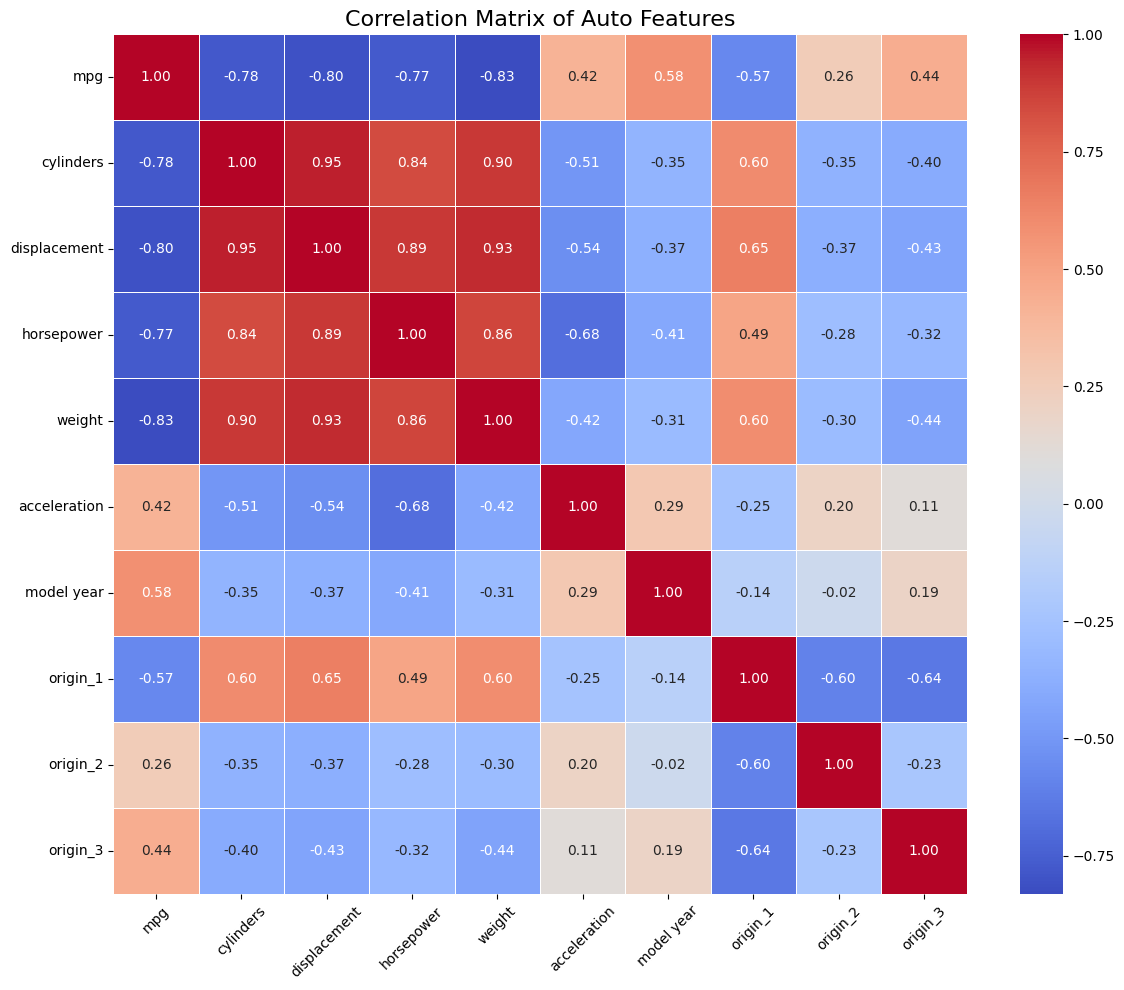

In [ ]:
# Calculate the Correlation Matrix
# The .corr() method computes the pairwise correlation of columns.
corr_matrix = df_prepped.corr()


# Isolate and Display Correlations with 'mpg'
# This helps to answer the specific question about mpg's relationships.
mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)

print("--- Correlation of Features with MPG ---")
print(mpg_corr)


# Create and Save the Heatmap Visualization
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Generate the heatmap using seaborn
sns.heatmap(
    corr_matrix,      
    annot=True,       
    cmap='coolwarm',  
    fmt=".2f",        
    linewidths=.5   
)

# Add a title and adjust layout
plt.title('Correlation Matrix of Auto Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot to a file
plt.savefig('correlation_heatmap.png')

print("\nCorrelation heatmap has been saved as 'correlation_heatmap.png'.")

### Conclusion

The correlation analysis reveals a clear and dominant trend: factors related to a car's size and power are the best predictors of its MPG. The features weight, displacement, cylinders, and horsepower all have strong negative correlations (below -0.77). This means that as any of these features increase, the car's MPG significantly decreases.

Secondary factors also play a role. The model year has a moderate positive correlation (+0.58), indicating that newer cars in this dataset are more fuel-efficient, likely due to technological advancements. A car's origin also matters, with American cars (origin_1) showing a moderate negative correlation (-0.57) with MPG compared to cars from other regions.